**Here the webscraping Project about Collecting the Data Covid-19 from www.mohfw.gov.in (ministry of health and family welfare) website and saving as ".CSV file". and adding Date column to the collected Data along with some daily data visualization.**

### Importing required libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("whitegrid")
%matplotlib inline

### Loading website

In [2]:
site = requests.get('https://www.mohfw.gov.in/')
site

<Response [200]>

### Applying BeautifulSoup with html.parser

In [3]:
soup = BeautifulSoup(site.content,"html.parser")

In [4]:
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>MoHFW | Home</title>
<link href="assets/images/favicon.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="assets/css/base.css" rel="stylesheet" type="text/css"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-162536712-2"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162536712-2');
</script>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.

### Taking header tags from website html code

In [5]:
thead = soup.find_all('thead')[-1]

In [6]:
head = thead.find_all('tr')

In [7]:
head

[<tr>
 <th><strong>S. No.</strong></th>
 <th><strong>Name of State / UT</strong></th>
 <th><strong>Active Cases*</strong></th>
 <th><strong>Cured/Discharged/Migrated*</strong></th>
 <th><strong>Deaths**</strong></th>
 <th><strong>Total Confirmed cases*</strong></th>
 </tr>]

### Taking Body tags from website html code

In [8]:
tbody = soup.find_all('tbody')[-1]

In [9]:
tbody

<tbody>
<tr>
<td>1</td>
<td>Andaman and Nicobar Islands</td>
<td>0</td>
<td>33</td>
<td>0</td>
<td>33</td>
</tr>
<tr>
<td>2</td>
<td>Andhra Pradesh</td>
<td>1150</td>
<td>2226</td>
<td>60</td>
<td>3436</td>
</tr>
<tr>
<td>3</td>
<td>Arunachal Pradesh</td>
<td>2</td>
<td>1</td>
<td>0</td>
<td>3</td>
</tr>
<tr>
<td>4</td>
<td>Assam</td>
<td>895</td>
<td>125</td>
<td>4</td>
<td>1024</td>
</tr>
<tr>
<td>5</td>
<td>Bihar</td>
<td>2150</td>
<td>1211</td>
<td>15</td>
<td>3376</td>
</tr>
<tr>
<td>6</td>
<td>Chandigarh</td>
<td>96</td>
<td>189</td>
<td>4</td>
<td>289</td>
</tr>
<tr>
<td>7</td>
<td>Chhattisgarh</td>
<td>314</td>
<td>100</td>
<td>1</td>
<td>415</td>
</tr>
<tr>
<td>8</td>
<td>Dadar Nagar Haveli</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>2</td>
</tr>
<tr>
<td>9</td>
<td>Delhi</td>
<td>9142</td>
<td>7846</td>
<td>398</td>
<td>17386</td>
</tr>
<tr>
<td>10</td>
<td>Goa</td>
<td>28</td>
<td>41</td>
<td>0</td>
<td>69</td>
</tr>
<tr>
<td>11</td>
<td>Gujarat</td>
<td>6343</td>
<td>8611</td

### Content Threads from Body of table (from website HTMLcode)

In [10]:
body = tbody.find_all('tr')

In [11]:
body

[<tr>
 <td>1</td>
 <td>Andaman and Nicobar Islands</td>
 <td>0</td>
 <td>33</td>
 <td>0</td>
 <td>33</td>
 </tr>,
 <tr>
 <td>2</td>
 <td>Andhra Pradesh</td>
 <td>1150</td>
 <td>2226</td>
 <td>60</td>
 <td>3436</td>
 </tr>,
 <tr>
 <td>3</td>
 <td>Arunachal Pradesh</td>
 <td>2</td>
 <td>1</td>
 <td>0</td>
 <td>3</td>
 </tr>,
 <tr>
 <td>4</td>
 <td>Assam</td>
 <td>895</td>
 <td>125</td>
 <td>4</td>
 <td>1024</td>
 </tr>,
 <tr>
 <td>5</td>
 <td>Bihar</td>
 <td>2150</td>
 <td>1211</td>
 <td>15</td>
 <td>3376</td>
 </tr>,
 <tr>
 <td>6</td>
 <td>Chandigarh</td>
 <td>96</td>
 <td>189</td>
 <td>4</td>
 <td>289</td>
 </tr>,
 <tr>
 <td>7</td>
 <td>Chhattisgarh</td>
 <td>314</td>
 <td>100</td>
 <td>1</td>
 <td>415</td>
 </tr>,
 <tr>
 <td>8</td>
 <td>Dadar Nagar Haveli</td>
 <td>2</td>
 <td>0</td>
 <td>0</td>
 <td>2</td>
 </tr>,
 <tr>
 <td>9</td>
 <td>Delhi</td>
 <td>9142</td>
 <td>7846</td>
 <td>398</td>
 <td>17386</td>
 </tr>,
 <tr>
 <td>10</td>
 <td>Goa</td>
 <td>28</td>
 <td>41</td>
 <td>0</td>

### Assigning table Data with 'Headers' and 'Body_rows' variables

In [12]:
Headers = []
Body_rows = []

for tr in head:
    td = tr.find_all(['th','td'])
    h_row = [i.text for i in td]
    Headers.append(h_row)
    
for tr in body:
    td = tr.find_all(['th','td'])
    b_row = [i.text for i in td]
    Body_rows.append(b_row)
    

In [23]:
Headers

[['S. No.',
  'Name of State / UT',
  'Active Cases*',
  'Cured/Discharged/Migrated*',
  'Deaths**',
  'Total Confirmed cases*']]

### Creating Dataframe with Headers and Body_rows 

In [13]:
Covid_Data = pd.DataFrame(Body_rows,columns = Headers[0])

### Dropping Unwanted Columns  from DataFrame

In [14]:
Covid_Data.drop('S. No.', axis=1, inplace=True)

### Dropping Unwanted Row from DataFrame

In [15]:
#Covid_Data.drop([*range(35, 39, 1)], axis=0, inplace=True)

In [16]:
Covid_Data = Covid_Data[:35]

In [17]:
Covid_Data

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,0,33,0,33
1,Andhra Pradesh,1150,2226,60,3436
2,Arunachal Pradesh,2,1,0,3
3,Assam,895,125,4,1024
4,Bihar,2150,1211,15,3376
5,Chandigarh,96,189,4,289
6,Chhattisgarh,314,100,1,415
7,Dadar Nagar Haveli,2,0,0,2
8,Delhi,9142,7846,398,17386
9,Goa,28,41,0,69


### I would like to add date column , which will throw me present date when i will excute the code(Day by Day)

In [18]:
today_date =  datetime.now()

In [19]:
Covid_Data['Date']=today_date.strftime("%d-%m-%Y")

### Replacing unwanted Cherecters from Deaths columns

In [20]:
Covid_Data['Deaths**'] = Covid_Data['Deaths**'].str.replace('#','')

### rearranging the columns

In [24]:
Covid_Data = Covid_Data[[ 'Date','Name of State / UT','Active Cases*','Cured/Discharged/Migrated*','Deaths**','Total Confirmed cases*']]

### Renameing columns to avoid errors in feature engineering  

In [26]:
Covid_Data.columns = ['Date','Name_of_state/UT','Active_Cases','Total_Confirmed_cases','Cured/Discharged/Migrated','Deaths']

### Finally we got Covid-19 Data from Official ministry of health and family welfare website.

### Which will give us Day by Day Data when we excute the code 

In [27]:
Covid_Data

,Date,Name_of_state/UT,Active_Cases,Total_Confirmed_cases,Cured/Discharged/Migrated,Deaths
0,30-05-2020,Andaman and Nicobar Islands,0,33,0,33
1,30-05-2020,Andhra Pradesh,1150,2226,60,3436
2,30-05-2020,Arunachal Pradesh,2,1,0,3
3,30-05-2020,Assam,895,125,4,1024
4,30-05-2020,Bihar,2150,1211,15,3376
5,30-05-2020,Chandigarh,96,189,4,289
6,30-05-2020,Chhattisgarh,314,100,1,415
7,30-05-2020,Dadar Nagar Haveli,2,0,0,2
8,30-05-2020,Delhi,9142,7846,398,17386
9,30-05-2020,Goa,28,41,0,69


### Data types checking in dataset

In [28]:
Covid_Data.dtypes

Date                         object
Name_of_state/UT             object
Active_Cases                 object
Total_Confirmed_cases        object
Cured/Discharged/Migrated    object
Deaths                       object
dtype: object

### Changing  data types to object to int checking in dataset

In [29]:
Covid_Data['Total_Confirmed_cases']=Covid_Data['Total_Confirmed_cases'].astype(int)

In [30]:
Covid_Data['Active_Cases']=Covid_Data['Active_Cases'].astype(int)

In [31]:
Covid_Data['Cured/Discharged/Migrated']=Covid_Data['Cured/Discharged/Migrated'].astype(int)

In [32]:
Covid_Data['Deaths']=Covid_Data['Deaths'].astype(int)

In [33]:
Covid_Data.dtypes

Date                         object
Name_of_state/UT             object
Active_Cases                  int32
Total_Confirmed_cases         int32
Cured/Discharged/Migrated     int32
Deaths                        int32
dtype: object

### Storing the Dataframe as CSV file

In [34]:
filename = "COVID19_"+(today_date.strftime("%d-%m-%Y")+".csv")
Covid_Data.to_csv(filename)

### Visualizations for Above Covid-19 Data

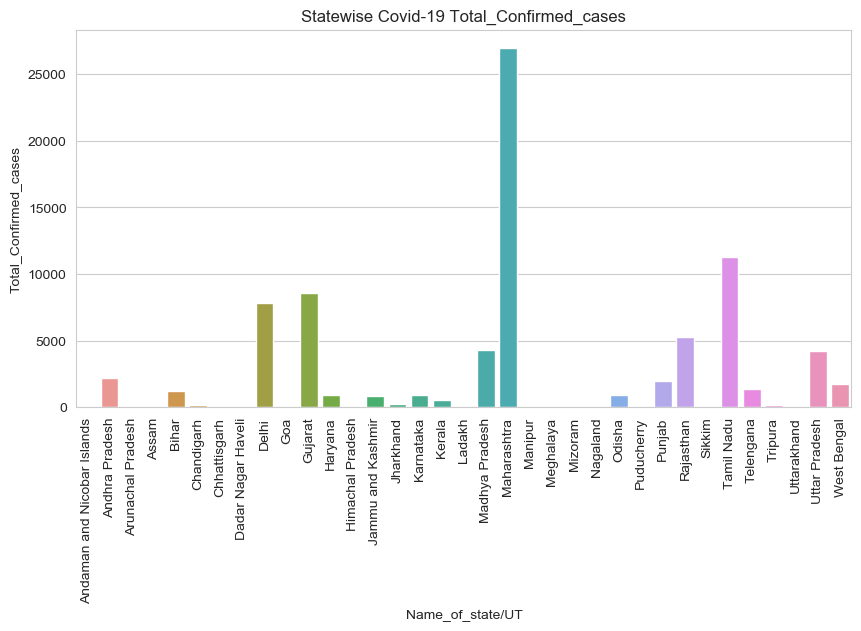

In [35]:
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(Covid_Data['Name_of_state/UT'],Covid_Data['Total_Confirmed_cases'])
plt.title("Statewise Covid-19 Total_Confirmed_cases")
plt.xticks(rotation=90);

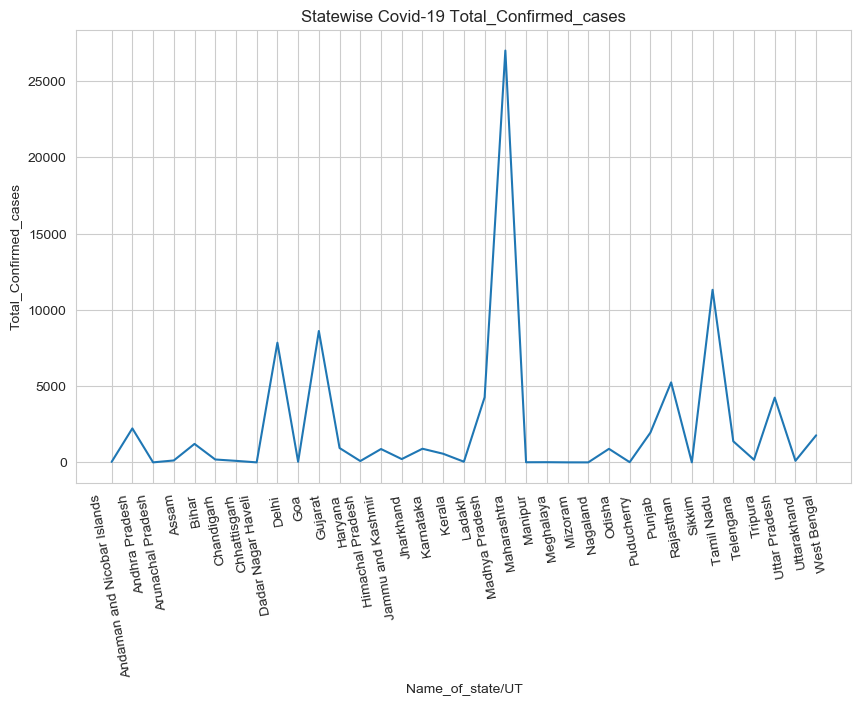

In [36]:
plt.figure(figsize=(10,6),dpi=100)
sns.lineplot(Covid_Data['Name_of_state/UT'],Covid_Data['Total_Confirmed_cases']);
plt.title("Statewise Covid-19 Total_Confirmed_cases")
plt.xticks(rotation=100);

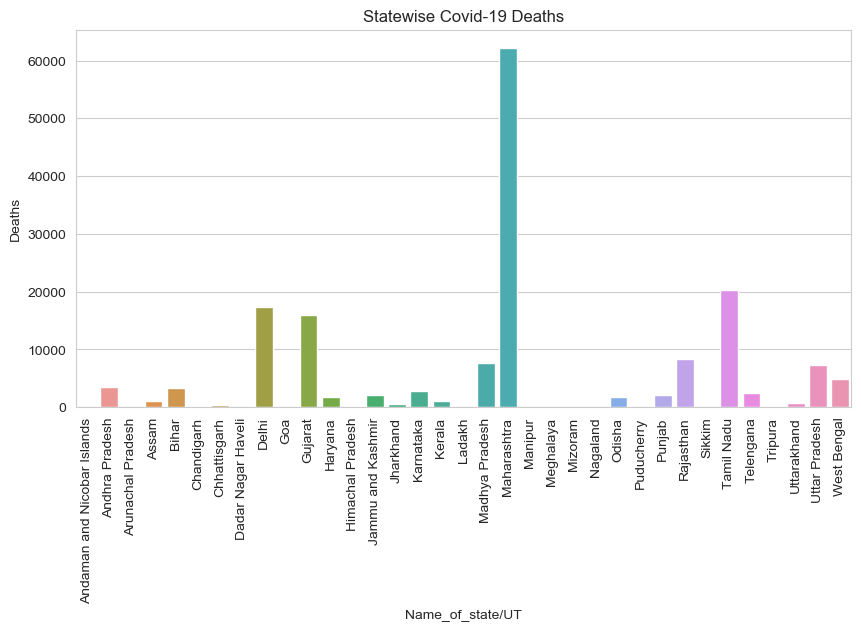

In [37]:
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(Covid_Data['Name_of_state/UT'],Covid_Data['Deaths'])
plt.title("Statewise Covid-19 Deaths")
plt.xticks(rotation=90);

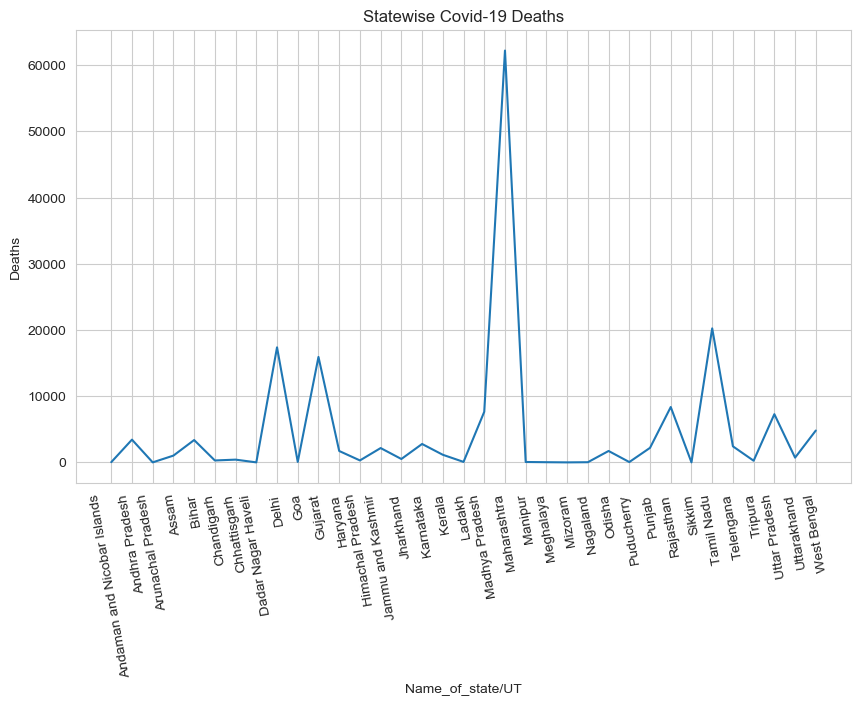

In [38]:
plt.figure(figsize=(10,6),dpi=100)
sns.lineplot(Covid_Data['Name_of_state/UT'],Covid_Data['Deaths']);
plt.title("Statewise Covid-19 Deaths")
plt.xticks(rotation=100);

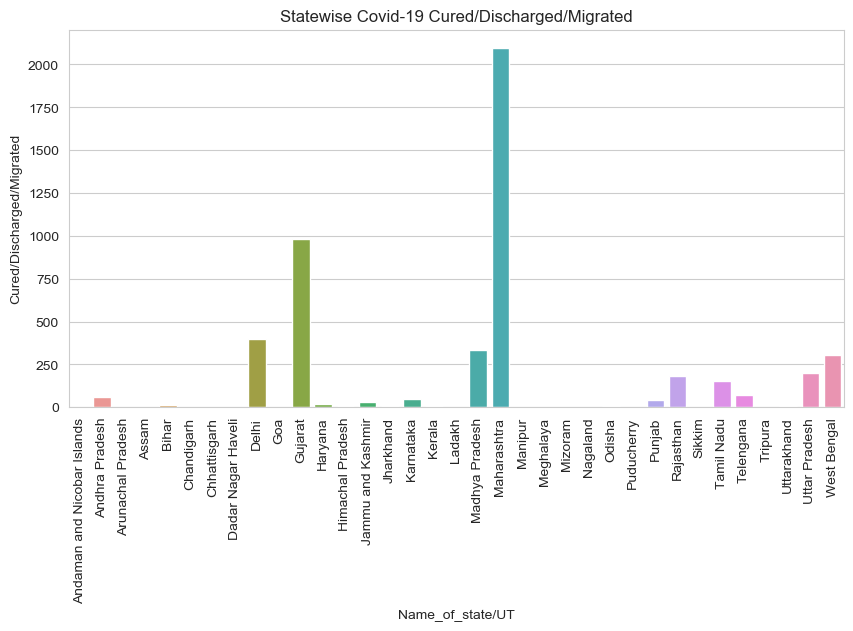

In [39]:
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(Covid_Data['Name_of_state/UT'],Covid_Data['Cured/Discharged/Migrated'])
plt.title("Statewise Covid-19 Cured/Discharged/Migrated")
plt.xticks(rotation=90);

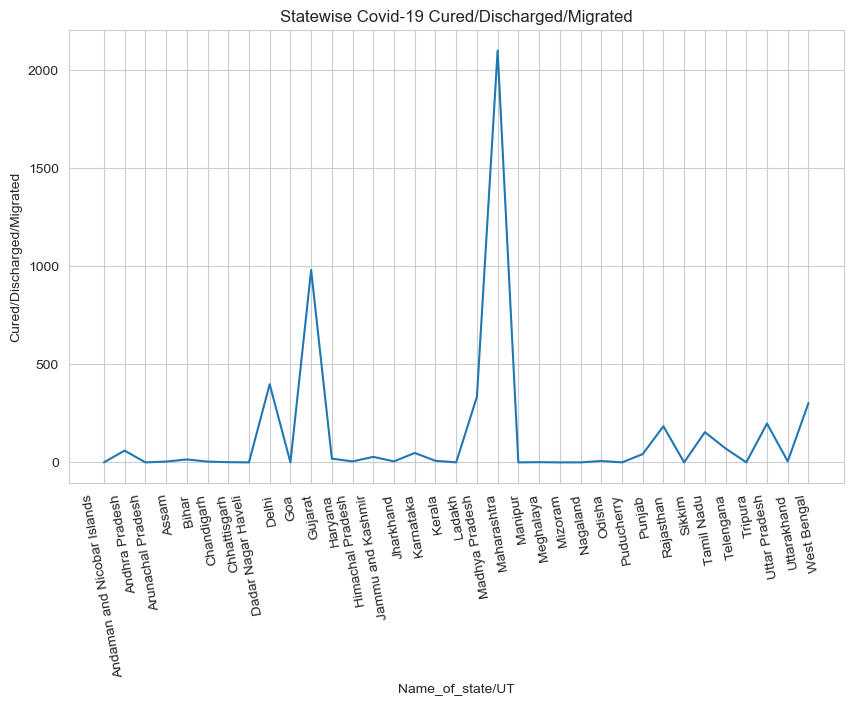

In [40]:
plt.figure(figsize=(10,6),dpi=100)
sns.lineplot(Covid_Data['Name_of_state/UT'],Covid_Data['Cured/Discharged/Migrated']);
plt.title("Statewise Covid-19 Cured/Discharged/Migrated")
plt.xticks(rotation=100);

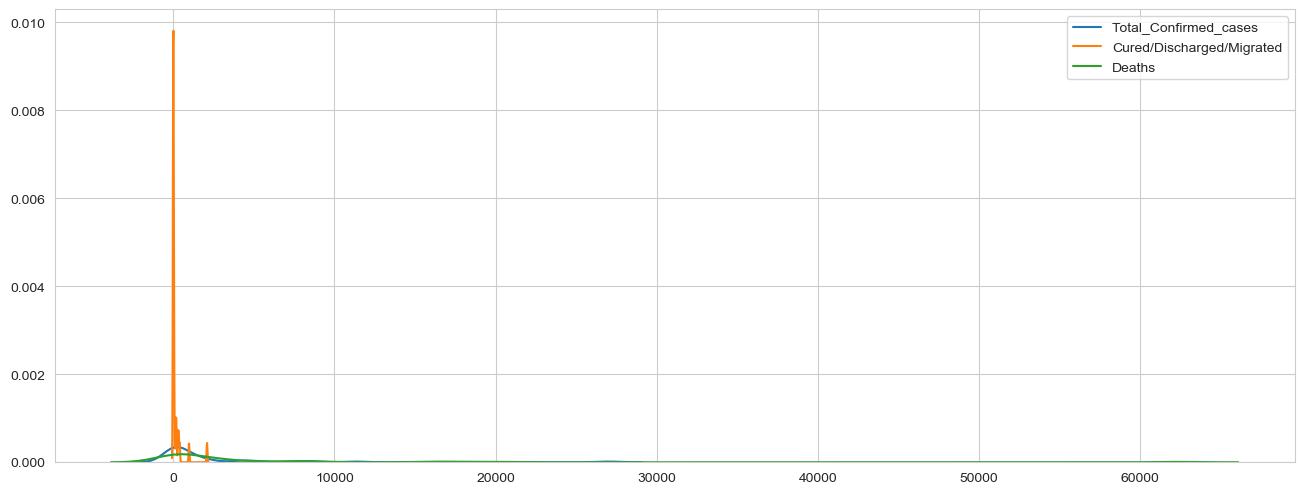

In [41]:
plt.figure(figsize=(16,6),dpi=100)
sns.kdeplot(Covid_Data["Total_Confirmed_cases"]);
sns.kdeplot(Covid_Data["Cured/Discharged/Migrated"]);
sns.kdeplot(Covid_Data["Deaths"]);

### Pie chart for Statewise persentage in Total_Confirmed_cases

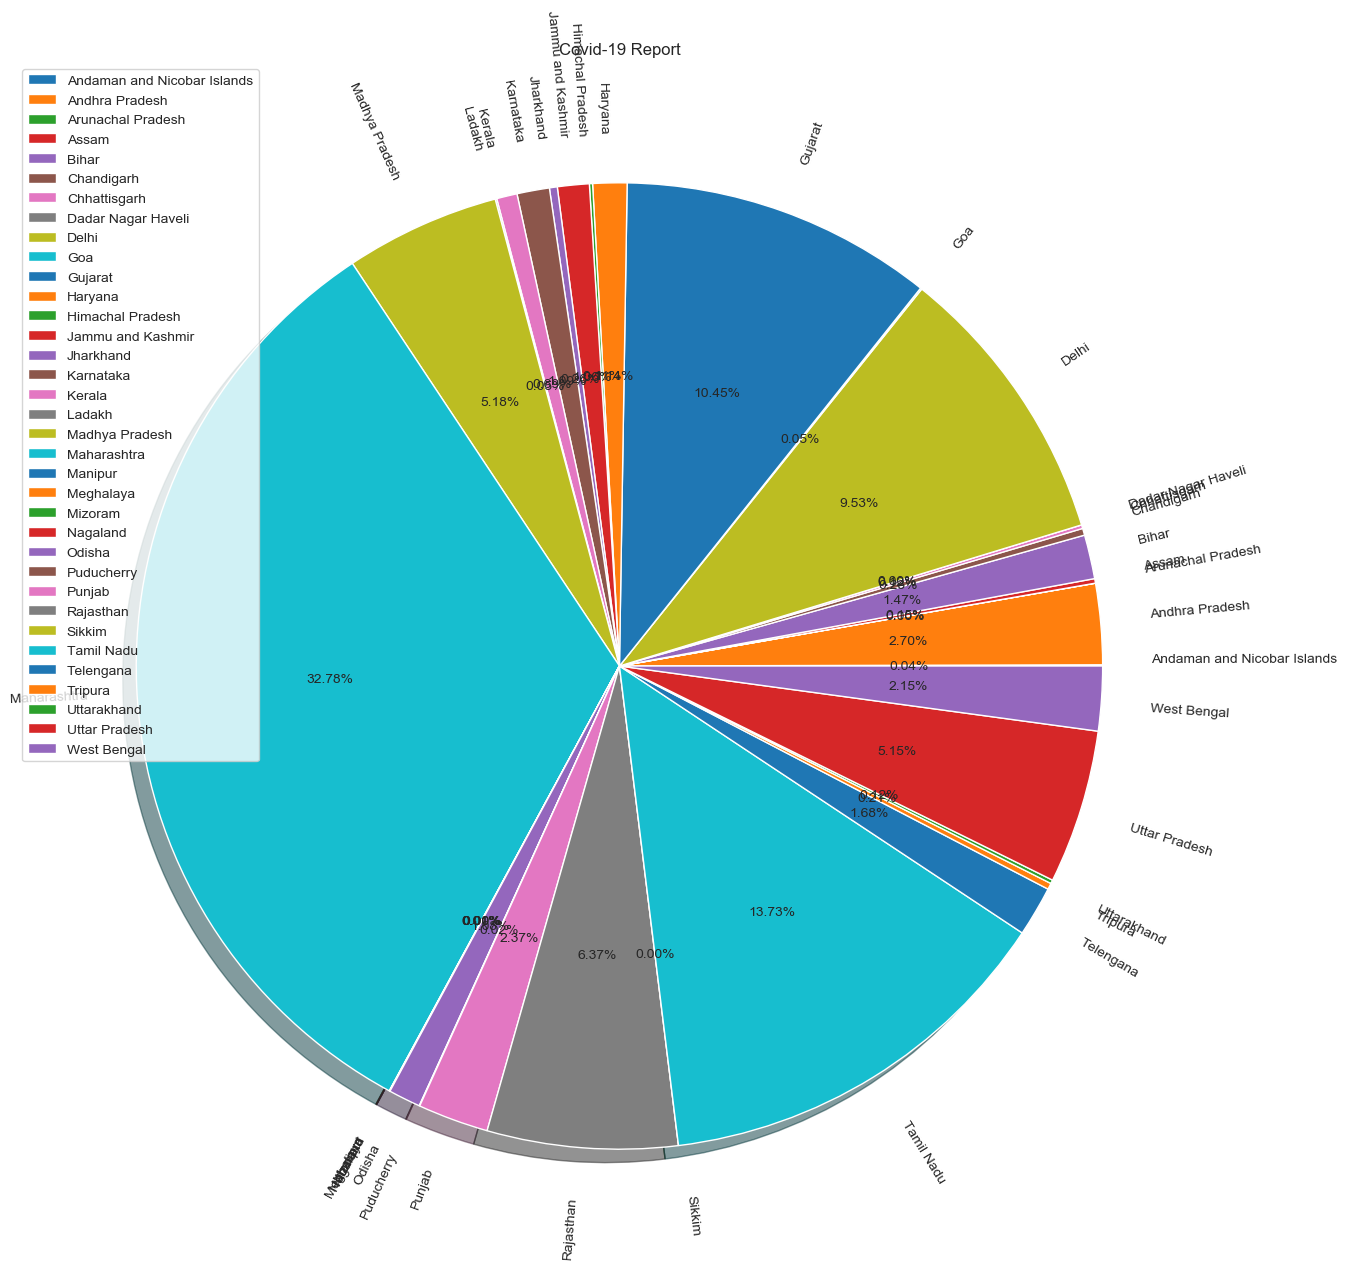

In [42]:
plt.figure(figsize=(16,16),dpi=100)
values = Covid_Data["Total_Confirmed_cases"]
labels = Covid_Data["Name_of_state/UT"]
plt.pie(values,labels = labels,shadow=True,rotatelabels = 300,autopct='%0.2f%%')
plt.title('Covid-19 Report')
plt.legend(labels,loc=0)  # 0 for the best
plt.show()